In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn

import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
X = df.iloc[:,:-1]

y = dataset.target

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [9]:
print('shape of x_train : ', x_train.shape)
print('shape of x_test : ', x_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of x_train :  (100, 4)
shape of x_test :  (50, 4)
shape of y_train :  (100,)
shape of y_test :  (50,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_classifier = DecisionTreeClassifier()

tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(453.375, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(383.625, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(523.125, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(348.75, 349.4571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(279.0, 271.8, 'X[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(139.5, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(69.75, 116.48571428571432, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 116.48571428571432, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(139.5, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(279.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(418.5, 194.14285714285717, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(3

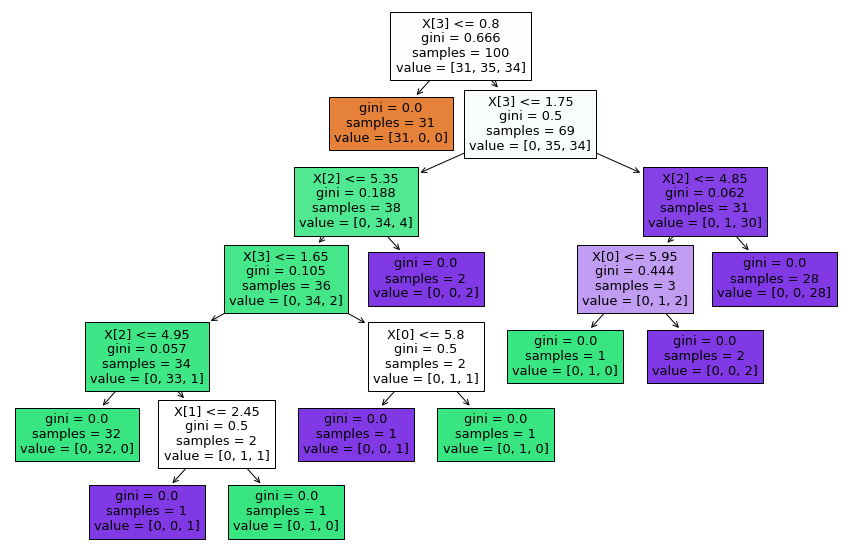

In [12]:
from sklearn import tree

plt.figure(figsize=(15,10))

tree.plot_tree(tree_classifier,filled=True)

In [13]:
# post pruning with maxdepth 2

tree_classifier2 = DecisionTreeClassifier(max_depth=2)
tree_classifier2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 453.0, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(334.8, 90.59999999999997, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(669.6, 90.59999999999997, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

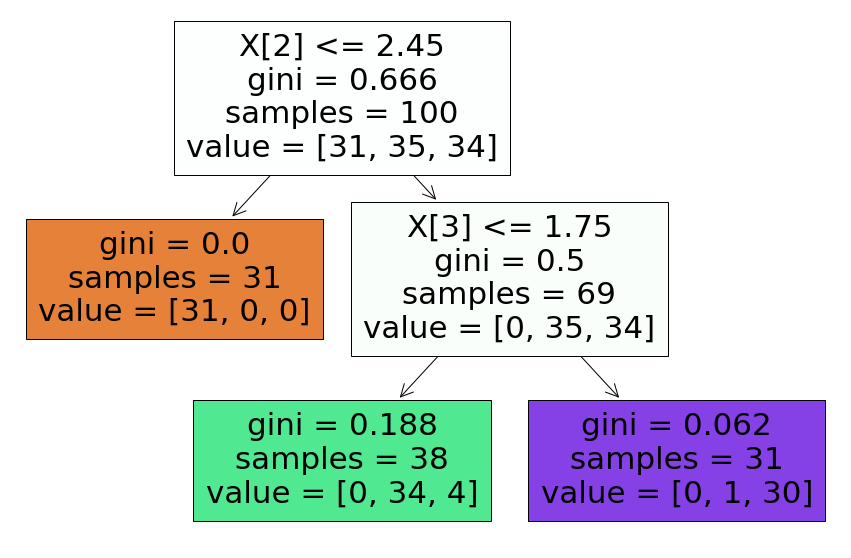

In [14]:
plt.figure(figsize=(15,10))

tree.plot_tree(tree_classifier2,filled=True)

In [15]:
# prediction

In [16]:
y_pred = tree_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [17]:
# hyperparameter tuning

parameters = {
    'criterion' : ['gini','entropy', 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
tree_classifier = DecisionTreeClassifier()

clf = GridSearchCV(tree_classifier, param_grid= parameters, cv=5, scoring='accuracy')

In [20]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [22]:
y_pred = clf.predict(x_test)

print(accuracy_score(y_pred,y_test))

0.96


In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

